Instalando frameworks:

In [ ]:
!pip install fastapi nest-asyncio pyngrok uvicorn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 745 kB 12.4 MB/s 
     |████████████████████████████████| 56 kB 1.9 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=0b3f86f114f05ae0f9dfa07bbe4c979e5fb96c7f6309628677734bbe940e7130
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


Importações para tratar a base de dados:

In [ ]:
import pandas as pd
import json

Lendo a base de dados:

In [ ]:
base_dados_xlsx = pd.read_excel('/content/flask_baseD.xlsx')
print(base_dados_xlsx)

   Number    Name  Age           City Country
0       1  Mahesh   25      Bangalore   India
1       2    Alex   26         London      UK
2       3   David   27  San Francisco     USA
3       4    John   28        Toronto  Canada
4       5   Chris   29          Paris  France


Convertendo a base de dados .xlsx para .json:

In [ ]:
base_dados_json = base_dados_xlsx.to_json(orient='records')
print(base_dados_json)

[{"Number":1,"Name":"Mahesh","Age":25,"City":"Bangalore","Country":"India"},{"Number":2,"Name":"Alex","Age":26,"City":"London","Country":"UK"},{"Number":3,"Name":"David","Age":27,"City":"San Francisco","Country":"USA"},{"Number":4,"Name":"John","Age":28,"City":"Toronto","Country":"Canada"},{"Number":5,"Name":"Chris","Age":29,"City":"Paris","Country":"France"}]


Usando FASTAPI:

In [ ]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

In [ ]:
app = FastAPI()

@app.get('/index')
async def home():
  return base_dados_json

ngrok_tunnel = ngrok.connect(8000)
print(f"Public URL: {ngrok_tunnel.public_url}/index")
nest_asyncio.apply()
uvicorn.run(app, port=8000)

INFO:     Started server process [69]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


Public URL: http://80c6-35-225-123-71.ngrok.io/index
INFO:     2804:14c:4c1:7e3:53:d897:dce:c2de:0 - "GET /index HTTP/1.1" 200 OK
INFO:     2804:14c:4c1:7e3:53:d897:dce:c2de:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [69]


Resultado:
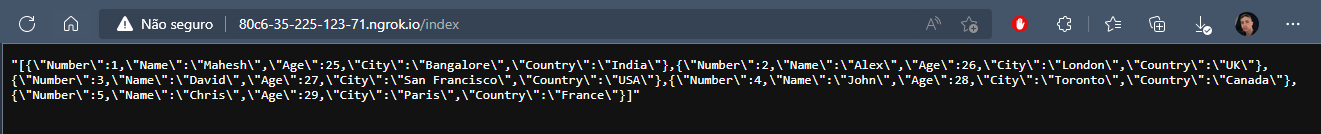